In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import nltk

import random
import xgboost as xgb

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# N- Grams
from nltk.util import ngrams
from collections import Counter

# Topic Modeling
##Feature Extraction
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn import ensemble, metrics, model_selection, naive_bayes

# Word 2 Vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Models
import datetime
from nltk import naivebayes

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
train = pd.read_csv('./train.csv',encoding="latin1")
test= pd.read_csv('./test.csv',encoding="latin1")

In [3]:
pd.set_option('max_colwidth', 500)
train.text= train.text.astype(str)
train.author = pd.Categorical(train.author)
train.iloc[:20,:]

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL
5,id22965,"A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.",MWS
6,id09674,"The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,"I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting your eyes upward to the great nebula in Orion, and I certainly expected that you would do so.",EAP
9,id00912,"I confess that neither the structure of languages, nor the code of governments, nor the politics of various states possessed attractions for me.",MWS


In [4]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    words = [lemmatizer.lemmatize(w) for w in words]#5

    return words

def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

In [5]:
# test case to see if our stemmering and lemmatization is running sussefully
print("The stemmed form of running is: {}".format(ps.stem("running")))
print("The stemmed form of knives is: {}".format(ps.stem("knives")))
print("The lemmatized form of knives is: {}".format(lemmatizer.lemmatize("knives")))


The stemmed form of running is: run
The stemmed form of knives is: knive
The lemmatized form of knives is: knife


In [6]:
print(nltk.word_tokenize(train.text[0]))

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [7]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)


179

In [8]:
# Function
def cloud(text, title):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    #mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
   # words = lemmatizer.lemmatize(x) # Redundant

    wordcloud = WordCloud(width=1400, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(" ".join(text))
    
    # Output Visualization
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=50,color='y')
    #fig.savefig("wordcloud.png", dpi=900)

None


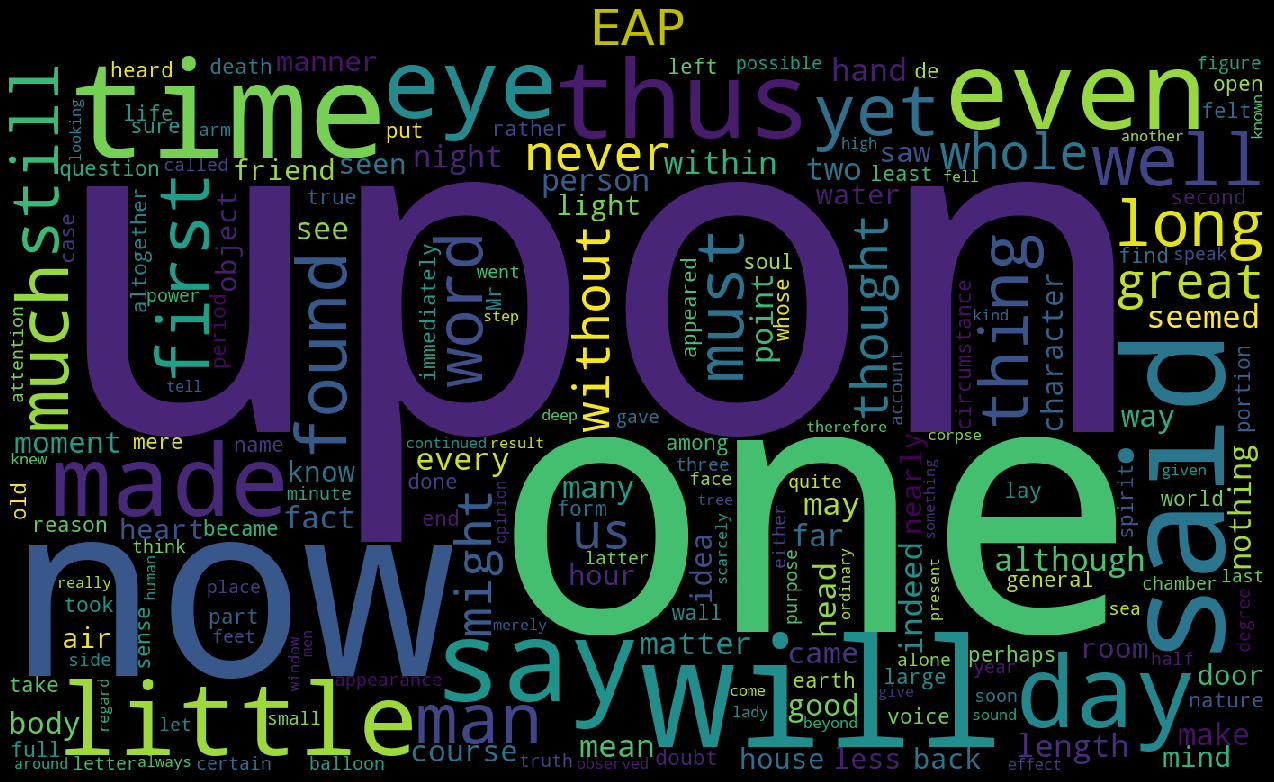

In [9]:
x = "EAP"
print(cloud(train[train.author == x]['text'].values,x))


None


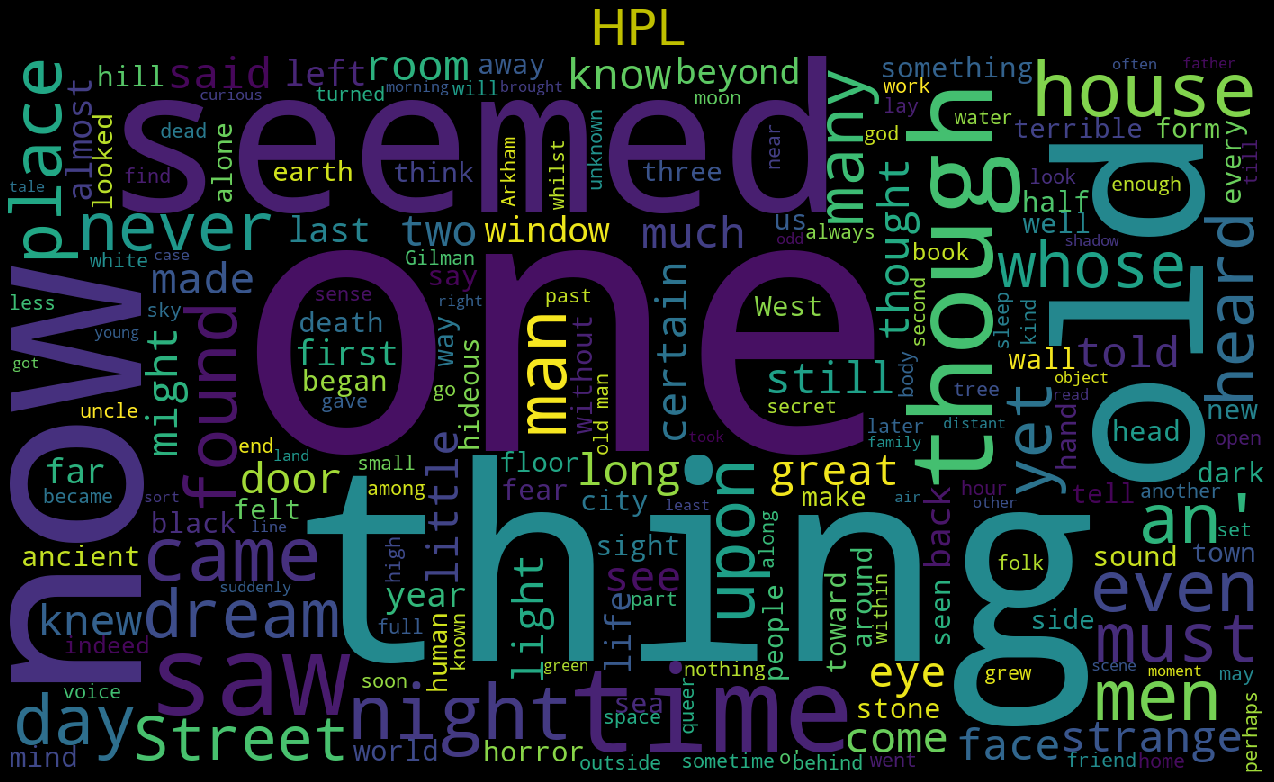

In [10]:
x = "HPL"
print(cloud(train[train.author == x]['text'].values,x))


None


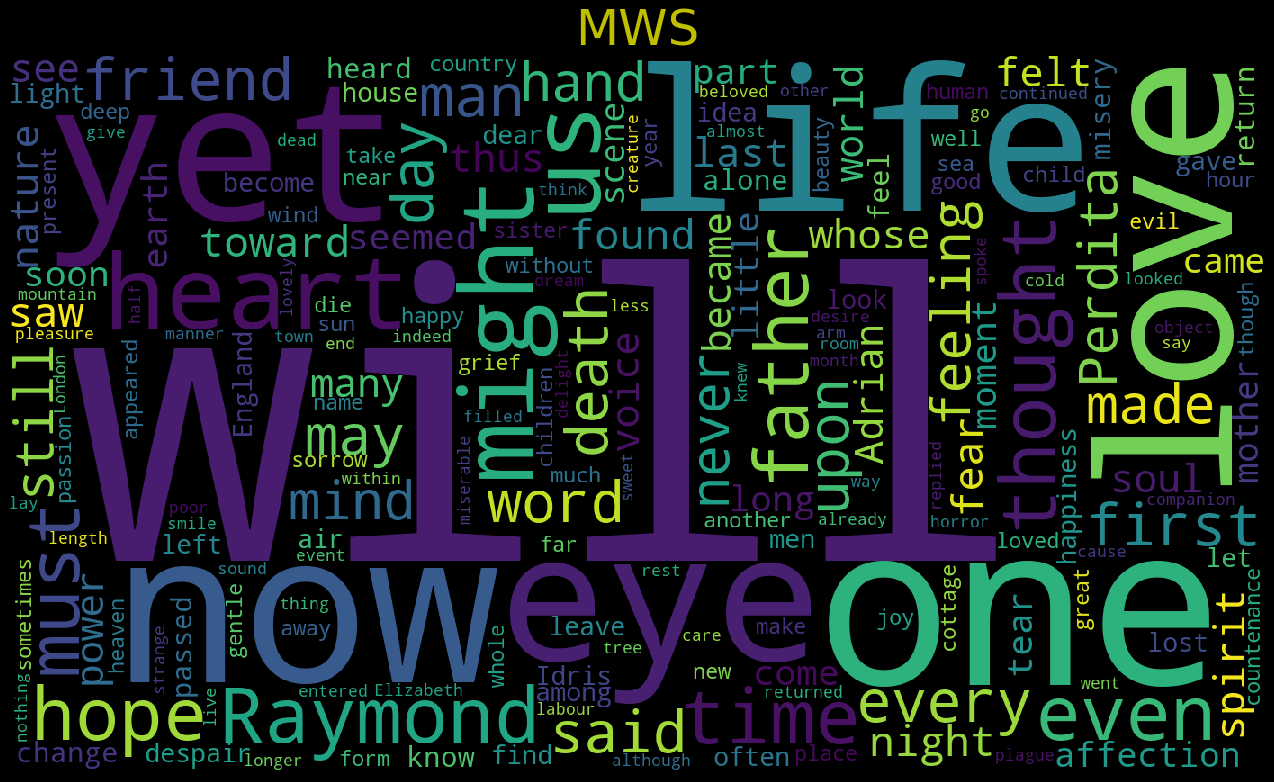

In [11]:
x = "MWS"
print(cloud(train[train.author == x]['text'].values,x))
#if can connect with java script

None


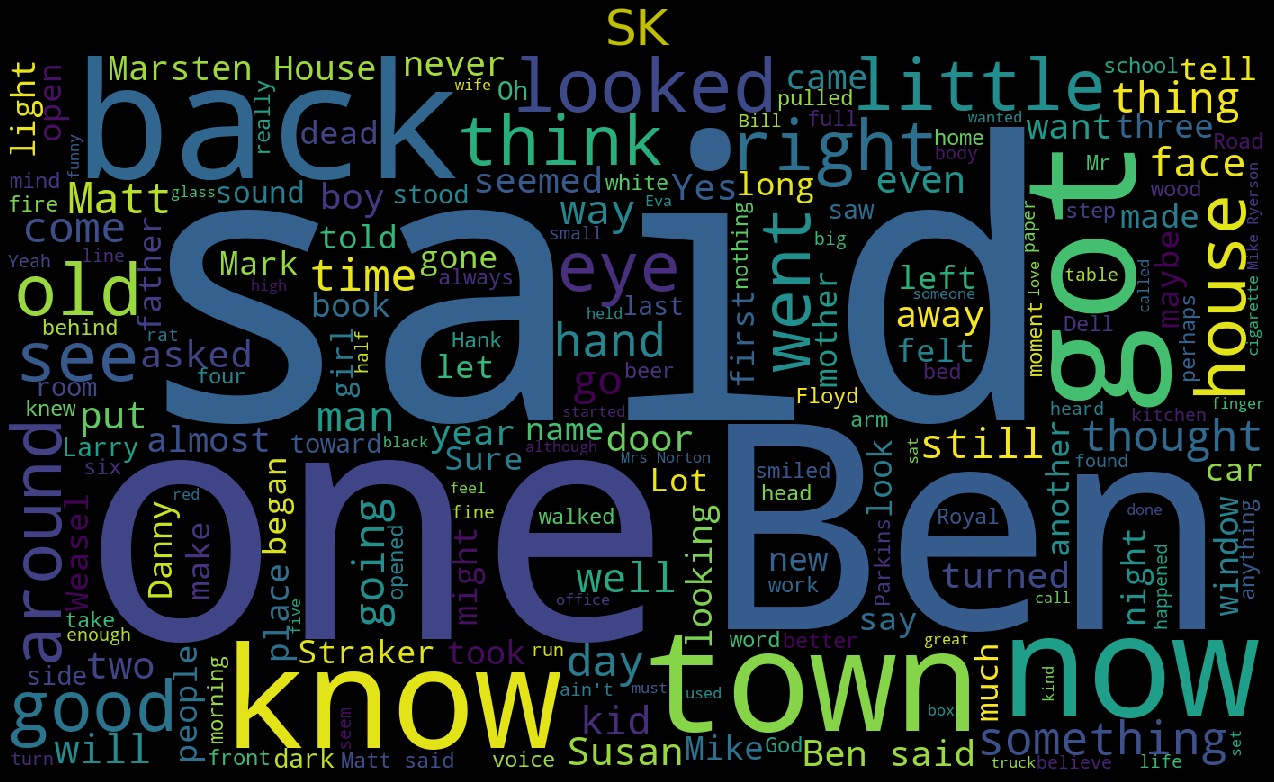

In [12]:
x = "SK"
print(cloud(train[train.author == x]['text'].values,x))

None


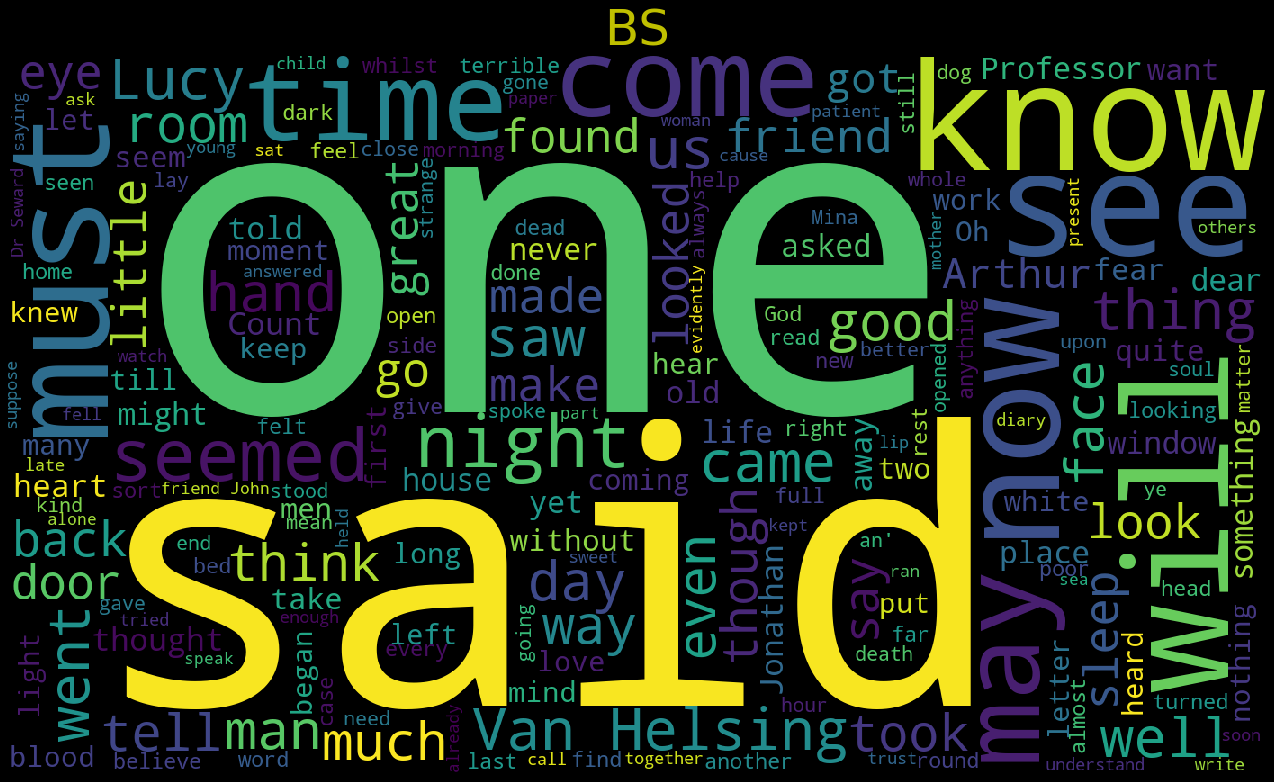

In [13]:
x = "BS"
print(cloud(train[train.author == x]['text'].values,x))

In [14]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = train.copy()
sentiment['polarity_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['pos'])
sentiment['sentiment']=''
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

# Normalize for Size
auth_sent= sentiment.groupby(['author','sentiment'])[['text']].count().reset_index()
for x in ['EAP','HPL','MWS']:
    auth_sent.text[auth_sent.author == x] = (auth_sent.text[auth_sent.author == x]/\
        auth_sent[auth_sent.author ==x].text.sum())*100


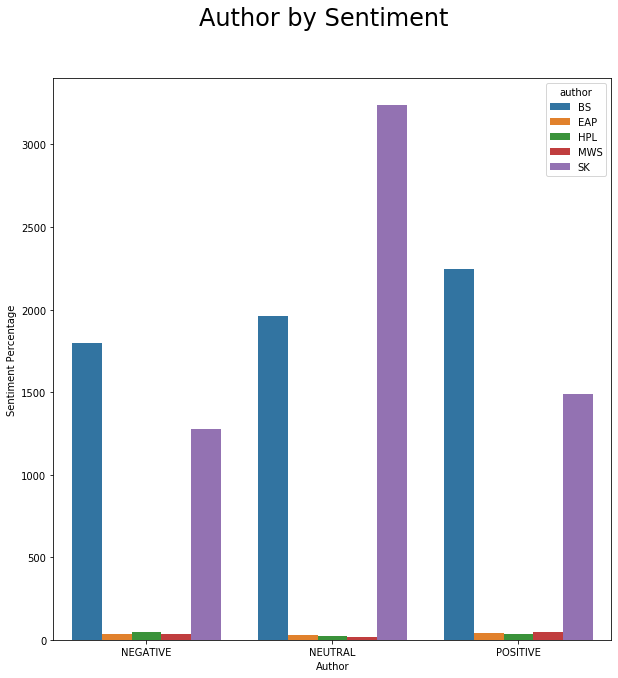

In [15]:
ax= sns.barplot(x='sentiment', y='text',hue='author',data=auth_sent)
ax.set(xlabel='Author', ylabel='Sentiment Percentage')
ax.figure.suptitle("Author by Sentiment", fontsize = 24)
plt.show()


Probability of occurance of the word depends upon the previous word eg: for N=2(bigram) the occurance of the next word depends upon the occcurance of the previous word N-1=1  
For Eg: No.of times chess player occured/No.of times chess occured


In [16]:
## Helper Functions
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting ngrams
    result = get_ngrams(text,n)
    # Counting ngrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(x, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(train[train.author == x]['text']),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out


In [17]:
gram_table(x="EAP", gram=[1,2,3,4], length=30)



,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,upon,1025,let u,50,gener john b,12,gener john b c,12
1,one,672,look upon,33,madam l espanay,12,brigadi gener john b,7
2,could,453,three four,23,john b c,12,ugh ugh ugh ugh,6
3,would,409,l etoil,23,ha ha ha,11,rue de drã me,6
4,said,356,one two,23,barriã du roul,10,brevet brigadi gener john,6
5,say,334,everi thing,22,ugh ugh ugh,8,john b c smith,6
6,time,315,ha ha,22,forti five degre,7,angl forti five degre,5
7,even,295,main compart,21,de l omelett,7,twenti four thousand mile,4
8,littl,277,said dupin,21,mill mill mill,7,detect bring practic nice,4
9,eye,270,old man,21,brigadi gener john,7,thousand thousand thousand thousand,4


In [18]:
gram_table(x="HPL", gram=[1,2,3,4], length=20)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,one,516,old man,59,heh heh heh,9,necronomicon mad arab abdul,4
1,could,480,could see,31,terribl old man,9,aira citi marbl beryl,4
2,thing,433,one night,23,small pane window,8,mad arab abdul alhazr,4
3,old,392,old woman,22,charl le sorcier,8,eric moreland clapham lee,4
4,would,357,one might,19,great great great,6,oonai citi lute danc,4
5,seem,317,one could,18,cap n obe,5,sir eric moreland clapham,3
6,like,296,heh heh,17,citi marbl beryl,5,region sea meet sky,3
7,time,281,next day,17,small hour morn,4,heh heh heh heh,3
8,man,280,shun hous,17,great old one,4,great great great grandfath,3
9,night,265,one thing,16,small furri thing,4,villag plain edg bog,3


In [19]:
gram_table(x="MWS", gram=[1,2,3,4], length=20)


,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,one,489,old man,29,let u go,4,accus caus death brother,2
1,would,475,lord raymond,28,whole human race,3,five year old mother,2
2,love,426,fellow creatur,23,time lord raymond,3,one day may claim,2
3,could,383,one day,21,nearli two year,3,noth pain human mind,2
4,life,334,nativ countri,16,five year old,3,abod near hyde park,2
5,yet,318,let u,16,might one day,3,like thousand pack wolv,2
6,even,298,everi day,15,creat anoth like,3,smile play upon lip,2
7,heart,290,day night,15,first rank among,3,becom one among fellow,2
8,day,288,look upon,14,return nativ countri,3,nearest town took post,2
9,eye,286,taken place,14,chang taken place,3,day may claim hand,2


In [20]:
gram_table(x="SK", gram=[1,2,3,4], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,said,558,ben said,69,mr norton said,14,faith lord hear prayer,5
1,like,310,marsten hous,65,let u pray,6,ask faith lord hear,5
2,ben,282,matt said,42,look marsten hous,6,four eye queer boy,4
3,look,259,mr norton,30,nine year old,6,look toward marsten hous,3
4,one,242,mike ryerson,29,rock n roll,5,emperor emperor ice cream,3
5,back,240,ben mear,27,ye ben said,5,eat chocol cover cherri,3
6,go,190,salem lot,25,lord hear prayer,5,rock n roll music,2
7,hous,174,parkin said,24,faith lord hear,5,faith never suffer etern,2
8,got,164,could see,23,ask faith lord,5,rais dead life give,2
9,would,161,parkin gillespi,22,taggart stream road,5,barlow new york buy,2


In [21]:
gram_table(x="BS", gram=[1,2,3,4], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,said,433,van hel,206,dr van hel,36,said dr van hel,6
1,one,390,could see,82,van hel said,15,held littl golden crucifix,3
2,could,371,dr seward,46,said van hel,10,window st mari church,3
3,look,362,friend john,45,poor dear luci,7,around ventur draw nearer,2
4,come,358,last night,38,professor van hel,6,calm seem absolut imperturb,2
5,know,336,dr van,36,said dr van,6,wall close heard say,2
6,see,334,mr harker,34,cover face hand,5,cross wall close heard,2
7,seem,313,lord godalm,30,van hel saw,5,men cross wall close,2
8,would,312,poor luci,29,oh madam mina,5,nearer men cross wall,2
9,must,304,poor dear,27,went back room,5,draw nearer men cross,2


meta features

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words


In [22]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)


179

In [23]:
## number of words in text 
train['num_words'] = train['text'].apply(lambda x : len(str(x).split()))
test['num_words'] = test['text'].apply(lambda x : len(str(x).split()))

## number of unique words in the text 
train['unique_words'] = train['text'].apply(lambda x : len(set(str(x).split())))
test['unique_words'] = test['text'].apply(lambda x : len(set(str(x).split())))

## num of characters in the text
train['char'] = train['text'].apply(lambda x : len(str(x)))
test['char'] = test['text'].apply(lambda x : len(str(x)))

## num of stop_words
train['stop_words'] = train['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))
test['stop_words'] = test['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))

## num of punctuations 
train['punc'] = train['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))
test['punc'] = test['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))

## num of upper case words
train['upper_case'] = train['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test['upper_case'] = test['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## number of title case words 
train['title_case'] = train['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))
test['title_case'] = test['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))

## average len words 
train['avg_words'] = train['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))
test['avg_words'] = test['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))


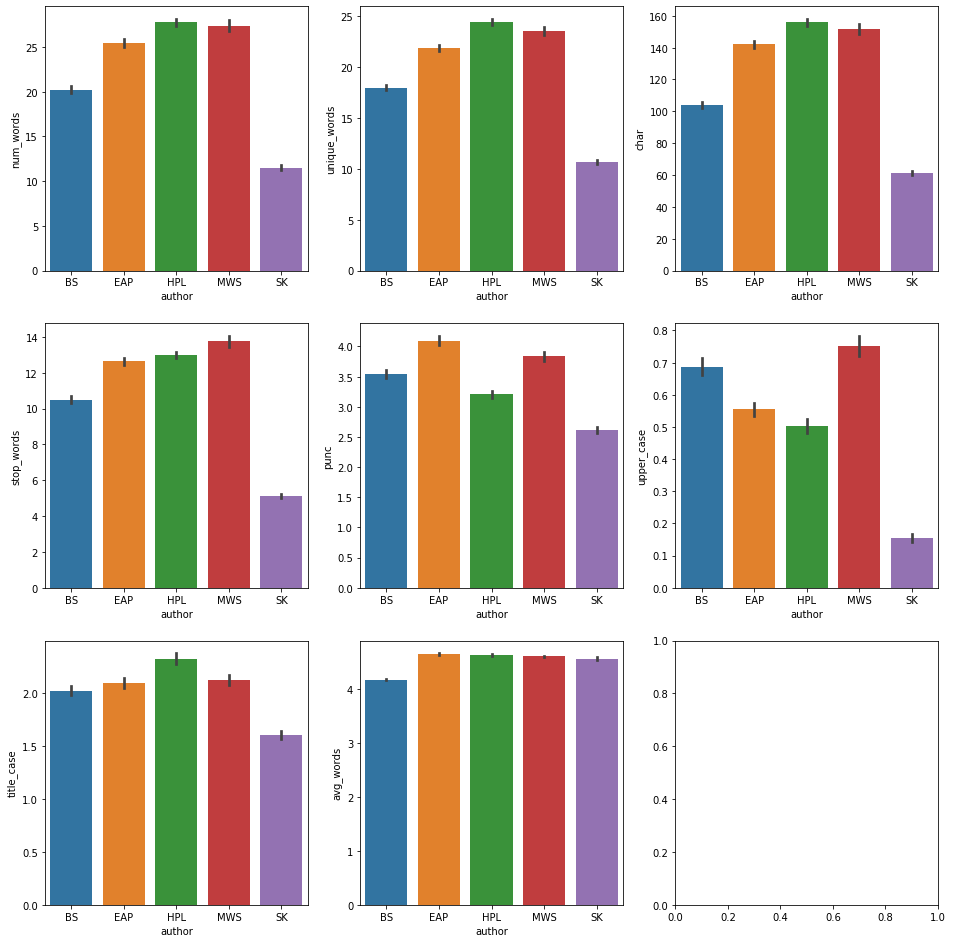

In [24]:
## plot some graphs based on some new features 
#features = ['num_words','unique_word','char','stop_words','punc','upper_case','title_case','mean_words']
_, axes = plt.subplots(3,3, figsize=(16,16))
axes = axes.flatten()
sns.barplot(x = 'author' , y = 'num_words' , data = train,ax=axes[0])
sns.barplot(x = 'author' , y = 'unique_words' , data = train,ax=axes[1])
sns.barplot(x = 'author' , y = 'char' , data = train,ax=axes[2])
sns.barplot(x = 'author' , y = 'stop_words' , data = train,ax=axes[3])
sns.barplot(x = 'author' , y = 'punc' , data = train,ax=axes[4])
sns.barplot(x = 'author' , y = 'upper_case' , data = train,ax=axes[5])
sns.barplot(x = 'author' , y = 'title_case' , data = train,ax=axes[6])
sns.barplot(x = 'author' , y = 'avg_words' , data = train,ax=axes[7])

#for i, feature in enumerate(features):
#    sns.barplot(x='author', y=feature, data=train, ax=axes[int(i/3),i%3])
#plt.show()





In [25]:
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2, 'SK' :3, 'BS':4}
train_y = train['author'].map(author_mapping_dict)
train_id = train['id'].values
test_id = test['id'].values
cols_to_drop = ['id', 'text']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)

In [26]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['num_class'] = 5
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 2000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

In [27]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
print("cv scores : ", cv_scores)


[0]	train-mlogloss:1.58873	test-mlogloss:1.58824
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[20]	train-mlogloss:1.42917	test-mlogloss:1.42463
[40]	train-mlogloss:1.38452	test-mlogloss:1.38089
[60]	train-mlogloss:1.36035	test-mlogloss:1.35922
[80]	train-mlogloss:1.34395	test-mlogloss:1.34539
[100]	train-mlogloss:1.33185	test-mlogloss:1.3357
[120]	train-mlogloss:1.32247	test-mlogloss:1.32934
[140]	train-mlogloss:1.3135	test-mlogloss:1.32313
[160]	train-mlogloss:1.30633	test-mlogloss:1.31814
[180]	train-mlogloss:1.30008	test-mlogloss:1.3145
[200]	train-mlogloss:1.29525	test-mlogloss:1.31211
[220]	train-mlogloss:1.29076	test-mlogloss:1.31012
[240]	train-mlogloss:1.2862	test-mlogloss:1.30883
[260]	train-mlogloss:1.28198	test-mlogloss:1.30693
[280]	train-mlogloss:1.27848	test-mlogloss:1.30634
[300]	train-mlogloss:1.275	test-mlogloss:1.30496
[320]	train-mlogloss:1.27167	test-mlogloss:1.

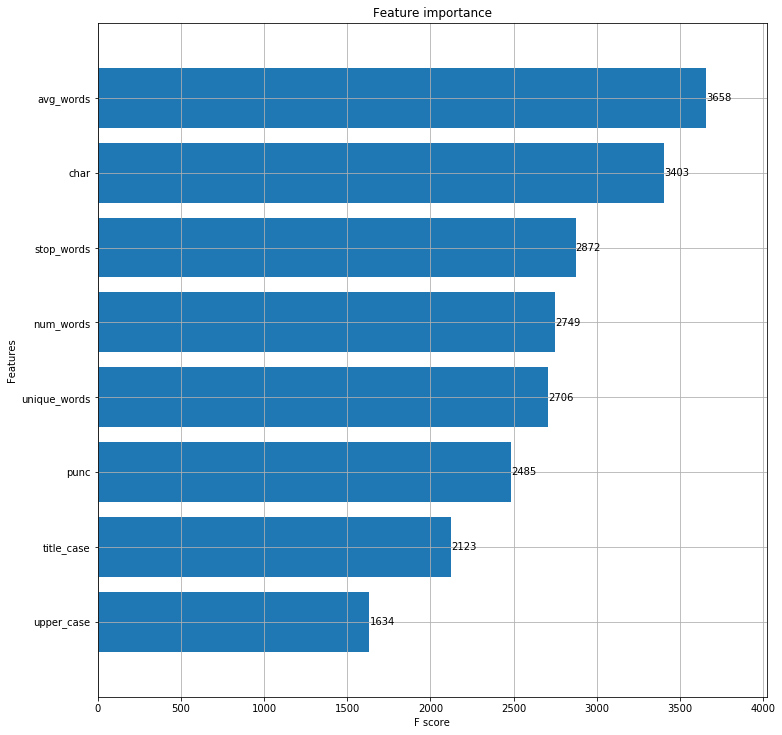

In [28]:
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


Number of characters, mean word length and number of unique words turn out to be the top 3 variables. Now let us focus on creating some text based features.



Text Based Features :

One of the basic features which we could create is tf-idf values of the words present in the text. So we can start with that one.

**********Naive Bayes*********************

In [29]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4))
full_tfidf = tfidf_vec.fit_transform(train['text'].values.astype('U'))
train_tfidf = tfidf_vec.transform(train['text'].values.astype('U'))
test_tfidf = tfidf_vec.transform(test['text'].values.astype('U'))


In [30]:
def runMNB(train_X, train_y, test_X, test_y, test_X2):
    model = naive_bayes.MultinomialNB()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [31]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.


Mean cv score :  1.2706388448150718


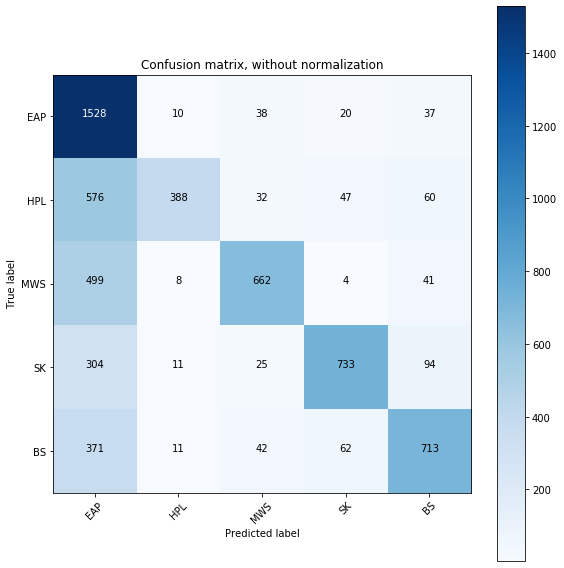

In [32]:
### Function to create confusion matrix for accuracy ###
import itertools
from sklearn.metrics import confusion_matrix

### From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py #
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS','SK','BS'],
                      title='Confusion matrix, without normalization')
plt.show()


Naive Bayes on Word Count Vectorizer:

In [33]:
### Fit transform the count vectorizer ###
count_vec = CountVectorizer(stop_words='english', ngram_range=(1,3))
full_count =count_vec.fit(train['text'].values.astype('U'))
train_count = count_vec.transform(train['text'].values.astype('U'))
test_count = count_vec.transform(test['text'].values.astype('U'))
#CountVectorizer

In [34]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_count[dev_index], train_count[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_count)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

# add the predictions as new features #
train["nb_cvec_eap"] = pred_train[:,0]
train["nb_cvec_hpl"] = pred_train[:,1]
train["nb_cvec_mws"] = pred_train[:,2]
test["nb_cvec_eap"] = pred_full_test[:,0]
test["nb_cvec_hpl"] = pred_full_test[:,1]
test["nb_cvec_mws"] = pred_full_test[:,2]


Mean cv score :  0.721135345609201


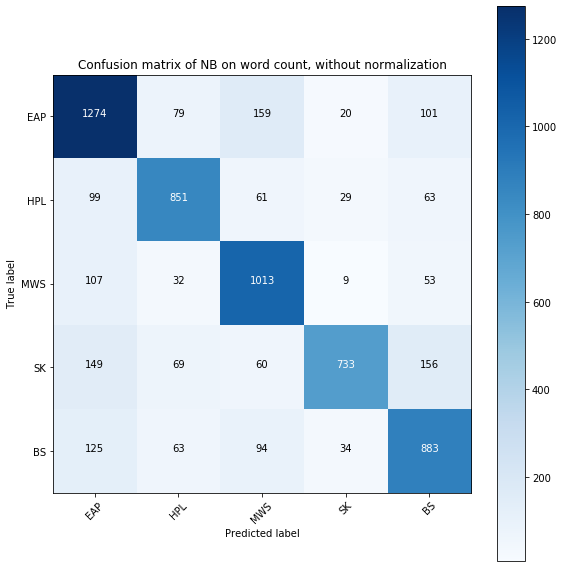

In [35]:
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS','SK','BS'],
                      title='Confusion matrix of NB on word count, without normalization')
plt.show()


In [36]:
cols_to_drop = ['id', 'text']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0, colsample=0.7)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
print("cv scores : ", cv_scores)
out_df = pd.DataFrame(pred_full_test)
out_df.columns = ['EAP', 'HPL', 'MWS','SK','BS']
out_df.insert(0, 'id', test_id)
out_df.to_csv("sub_fe.csv", index=False)


[0]	train-mlogloss:1.52427	test-mlogloss:1.52409
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[20]	train-mlogloss:0.894606	test-mlogloss:0.899221
[40]	train-mlogloss:0.759998	test-mlogloss:0.768653
[60]	train-mlogloss:0.712055	test-mlogloss:0.72393
[80]	train-mlogloss:0.688736	test-mlogloss:0.703344
[100]	train-mlogloss:0.673805	test-mlogloss:0.691285
[120]	train-mlogloss:0.662583	test-mlogloss:0.684142
[140]	train-mlogloss:0.653323	test-mlogloss:0.678724
[160]	train-mlogloss:0.64562	test-mlogloss:0.674645
[180]	train-mlogloss:0.639028	test-mlogloss:0.671478
[200]	train-mlogloss:0.633046	test-mlogloss:0.668801
[220]	train-mlogloss:0.627513	test-mlogloss:0.667363
[240]	train-mlogloss:0.622058	test-mlogloss:0.665715
[260]	train-mlogloss:0.617096	test-mlogloss:0.664883
[280]	train-mlogloss:0.612215	test-mlogloss:0.664038
[300]	train-mlogloss:0.6073	test-mlogloss:0.662783
[320]	train-m

In [37]:
from IPython.display import FileLink, FileLinks


#FileLinks('.')
out_df.to_csv('C:/Users/Anisha/Documents/spooky-author-identification/output/sub_fe.csv', index=False)
FileLinks('C:/Users/Anisha/Documents/spooky-author-identification/output')

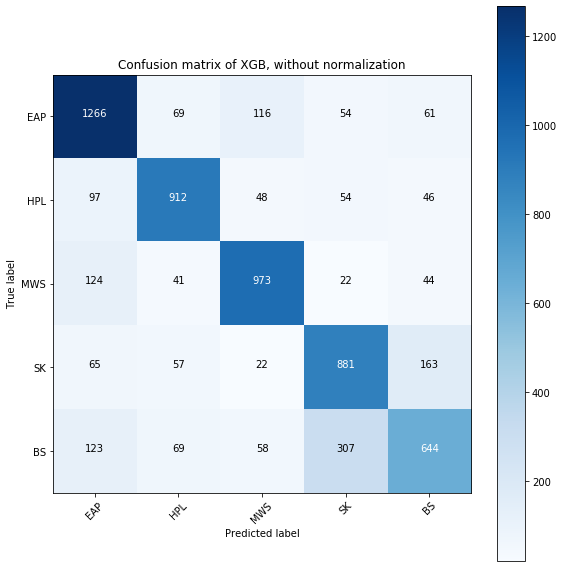

In [38]:
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS','SK','BS'],
                      title='Confusion matrix of XGB, without normalization')
plt.show()


*******************Logistic Regression**********************

In [39]:
X = train['text']
y = train['author']

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(25264,) (25264,) (6316,) (6316,)


In [42]:
print(train_y.value_counts(),'\n', test_y.value_counts())


EAP    6349
MWS    4784
BS     4781
SK     4767
HPL    4583
Name: author, dtype: int64 
 EAP    1551
MWS    1260
SK     1234
BS     1219
HPL    1052
Name: author, dtype: int64


In [43]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vect = CountVectorizer()
vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|\:')
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='(?u)\\b\\w+\\b|\\,|\\.|\\;|\\:', tokenizer=None,
                vocabulary=None)

In [44]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
train_X_dtm = vect.fit_transform(train_X)
# examine the document-term matrix created from X_train
train_X_dtm

<25264x29458 sparse matrix of type '<class 'numpy.int64'>'
	with 544351 stored elements in Compressed Sparse Row format>

In [45]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<6316x29458 sparse matrix of type '<class 'numpy.int64'>'
	with 133924 stored elements in Compressed Sparse Row format>

In [46]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')


In [47]:
from string import punctuation
train_X_chars = train_X.str.len()
train_X_punc = train_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
test_X_chars = test_X.str.len()
test_X_punc = test_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
train_X_dtm = add_feature(train_X_dtm, [train_X_chars, train_X_punc])
test_X_dtm = add_feature(test_X_dtm, [test_X_chars, test_X_punc])


In [48]:
train_X_dtm


<25264x29460 sparse matrix of type '<class 'numpy.int64'>'
	with 594826 stored elements in Compressed Sparse Row format>

In [49]:
test_X_dtm

<6316x29460 sparse matrix of type '<class 'numpy.int64'>'
	with 146547 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
from sklearn.model_selection import GridSearchCV


In [52]:
grid_values = {'C':[0.01, 0.1, 1.0, 3.0, 5.0]}
grid_logreg = GridSearchCV(logreg, param_grid=grid_values, scoring='neg_log_loss')
grid_logreg.fit(train_X_dtm, train_y)
grid_logreg.best_params_

{'C': 1.0}

In [53]:
# set with recommended parameter
logreg = LogisticRegression(C=1.0, random_state=8)
# train the model using train_X_dtm & train_y
logreg.fit(train_X_dtm, train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# make class predictions for test_X_dtm
y_pred_test = logreg.predict(test_X_dtm)

In [55]:
# look at the confusion matrix for y_test
metrics.confusion_matrix(test_y, y_pred_test)

array([[ 901,  114,   52,   45,  107],
       [ 100, 1199,   48,  110,   94],
       [  60,   93,  789,   53,   57],
       [  56,  132,   53,  988,   31],
       [  70,   38,   45,    7, 1074]], dtype=int64)

In [56]:
# compute the predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(test_X_dtm)
y_pred_prob[:10]


array([[2.72e-02, 5.99e-01, 2.26e-01, 2.67e-02, 1.21e-01],
       [6.85e-01, 2.56e-02, 2.50e-01, 3.73e-02, 1.90e-03],
       [2.53e-02, 6.76e-01, 2.57e-01, 2.93e-02, 1.29e-02],
       [9.11e-02, 2.62e-03, 1.36e-01, 1.35e-02, 7.57e-01],
       [5.24e-01, 1.99e-01, 2.53e-01, 2.08e-03, 2.23e-02],
       [8.92e-04, 9.47e-01, 4.33e-02, 9.28e-03, 5.14e-09],
       [5.47e-02, 6.09e-02, 3.25e-02, 5.53e-03, 8.46e-01],
       [1.77e-03, 2.50e-01, 1.71e-02, 6.78e-04, 7.30e-01],
       [2.73e-06, 9.37e-01, 6.00e-02, 3.33e-03, 7.25e-09],
       [1.29e-03, 2.93e-03, 2.90e-03, 6.31e-03, 9.87e-01]])

In [57]:
metrics.log_loss(test_y, y_pred_prob)

0.626992207374461

In [58]:
train = pd.read_csv('./train.csv', encoding='latin1')
## look at the first few rows
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [59]:
### Split data

# split the data by author
byAuthor = train.groupby("author")

### Tokenize (split into individual words) our text

# word frequency by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    # split the text into individual tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(tokens)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[name] = (frequency)
    
# now we have an dictionary where each entry is the frequency distrobution
# of words for a specific author.     


In [60]:
# see how often each author says "blood"
for i in wordFreqByAuthor.keys():
    print("blood: " + i)
    print(wordFreqByAuthor[i].freq('blood'))

# print a blank line
print()

# see how often each author says "scream"
for i in wordFreqByAuthor.keys():
    print("scream: " + i)
    print(wordFreqByAuthor[i].freq('scream'))
    
# print a blank line
print()

# see how often each author says "fear"
for i in wordFreqByAuthor.keys():
    print("fear: " + i)
    print(wordFreqByAuthor[i].freq('fear'))
# print a blank line
print()

# see how often each author says "upon"
for i in wordFreqByAuthor.keys():
    print("upon: " + i)
    print(wordFreqByAuthor[i].freq('upon'))


blood: BS
0.0006044358480234948
blood: EAP
0.00014645324695463396
blood: HPL
0.00022980449382687678
blood: MWS
0.00022772649518331984
blood: SK
0.00019211603808700454

scream: BS
3.555504988373499e-05
scream: EAP
1.72297937593687e-05
scream: HPL
9.192179753075071e-05
scream: MWS
2.647982502131626e-05
scream: SK
9.605801904350227e-05

fear: BS
0.0006186578679769888
fear: EAP
0.0001033787625562122
fear: HPL
0.0005745112345671919
fear: MWS
0.0006196279054988005
fear: SK
0.00021613054284788012

upon: BS
0.00040532756867457887
upon: EAP
0.004415134650838229
upon: HPL
0.001068590896294977
upon: MWS
0.0010591930008526504
upon: SK
1.2007252380437784e-05


In [61]:
# first, let's start with a test sentence
testSentence = "His soul overflowed with ardent affections, and his friendship was of that devoted and wondrous nature that the world minded teach us to look for only in the imagination"
# and then lowercase & tokenize our test sentence
preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())

# create an empy dataframe to put our output in
testProbailities = pd.DataFrame(columns = ['author','word','probability'])

# For each author...
for i in wordFreqByAuthor.keys():
    # for each word in our test sentence...
    for j  in preProcessedTestSentence:
        # find out how frequently the author used that word
        wordFreq = wordFreqByAuthor[i].freq(j)
        # and add a very small amount to every prob. so none of them are 0
        smoothedWordFreq = wordFreq + 0.000001
        # add the author, word and smoothed freq. to our dataframe
        output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
        testProbailities = testProbailities.append(output, ignore_index = True)

# empty dataframe for the probability that each author wrote the sentence
testProbailitiesByAuthor = pd.DataFrame(columns = ['author','jointProbability'])

# now let's group the dataframe with our frequency by author
for i in wordFreqByAuthor.keys():
    # get the joint probability that each author wrote each word
    oneAuthor = testProbailities.query('author == "' + i + '"')
    jointProbability = oneAuthor.product(numeric_only = True)[0]
    
    # and add that to our dataframe
    output = pd.DataFrame([[i, jointProbability]], columns = ['author','jointProbability'])
    testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)

# and our winner is...
testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author']


'MWS'